In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [61]:
df = pd.read_csv("primary-experts.csv")

In [62]:
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,MoEAutoEncoder-0.activation_dim,MoEAutoEncoder-0.auxk_alpha,...,MoEAutoEncoder-1/frac_variance_explained,MoEAutoEncoder-1/l0,MoEAutoEncoder-1/l1_loss,MoEAutoEncoder-1/l2_loss,MoEAutoEncoder-1/l2_ratio,MoEAutoEncoder-1/loss,MoEAutoEncoder-1/loss_original,MoEAutoEncoder-1/loss_reconstructed,MoEAutoEncoder-1/loss_zero,MoEAutoEncoder-1/mse_loss
0,magic-lake-8,finished,-,NaN,NaN,2024-07-12T01:25:20.000Z,47809,NaN,768,0.03125,...,0.979390,357.408691,1019.558350,33.428810,0.958236,1181.788208,3.269921,3.383254,17.599813,1192.383789
1,floral-gorge-7,finished,-,NaN,NaN,2024-07-12T01:24:57.000Z,46789,NaN,768,0.03125,...,0.972070,228.553345,691.600830,38.875824,0.942800,1597.617432,3.269921,3.470538,17.599813,1615.833862
2,eager-microwave-6,finished,-,NaN,NaN,2024-07-12T01:24:46.000Z,46039,NaN,768,0.03125,...,0.965758,150.518799,502.489014,43.023064,0.929280,1957.546387,3.269921,3.601077,17.599813,1981.042725
3,smooth-fire-5,finished,-,NaN,NaN,2024-07-12T01:23:28.000Z,50973,NaN,768,0.03125,...,0.951561,95.693237,354.747742,51.281185,0.898818,2773.417480,3.269921,4.049817,17.599813,2802.436523
4,fiery-bird-4,finished,-,NaN,NaN,2024-07-12T01:23:24.000Z,43812,NaN,768,0.03125,...,0.981918,348.283936,906.020874,31.352291,0.963288,1032.502197,3.269921,3.362242,17.599813,1046.085083
5,sparkling-spaceship-3,finished,-,NaN,NaN,2024-07-12T01:21:59.000Z,45450,NaN,768,0.03125,...,0.975783,237.771729,650.324524,36.273232,0.950481,1384.728516,3.269921,3.431814,17.599813,1401.034302
6,wobbly-sun-2,finished,-,NaN,NaN,2024-07-12T01:21:40.000Z,45223,NaN,768,0.03125,...,0.969883,161.546875,498.253906,40.436913,0.937811,1724.624512,3.269921,3.534433,17.599813,1742.415894
7,summer-oath-1,finished,-,NaN,NaN,2024-07-12T01:21:27.000Z,51754,NaN,768,0.03125,...,0.953613,137.774780,410.845642,50.286625,0.903176,2647.950195,3.269921,3.971145,17.599813,2683.703857


In [63]:
patterns = ['effective_l0$', 'experts$', 'heaviside$', 'mse_loss$', 'frac_recovered$', 'loss_original$', 'loss_reconstructed$']

In [64]:
filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
df = df[filtered_columns]

In [65]:
df

,MoEAutoEncoder-0.experts,MoEAutoEncoder-0.heaviside,MoEAutoEncoder-1.experts,MoEAutoEncoder-1.heaviside,MoEAutoEncoder-0/effective_l0,MoEAutoEncoder-0/frac_recovered,MoEAutoEncoder-0/loss_original,MoEAutoEncoder-0/loss_reconstructed,MoEAutoEncoder-0/mse_loss,MoEAutoEncoder-1/effective_l0,MoEAutoEncoder-1/frac_recovered,MoEAutoEncoder-1/loss_original,MoEAutoEncoder-1/loss_reconstructed,MoEAutoEncoder-1/mse_loss
0,32,False,32,True,128,0.992634,3.330375,3.433748,1182.766846,128,0.992091,3.269921,3.383254,1192.383789
1,32,False,32,True,64,0.986329,3.330375,3.522242,1601.124268,64,0.986000,3.269921,3.470538,1615.833862
2,32,False,32,True,32,0.977582,3.330375,3.644989,1961.715332,32,0.976891,3.269921,3.601077,1981.042725
3,32,False,32,True,8,0.947015,3.330375,4.073980,2777.880371,8,0.945576,3.269921,4.049817,2802.436523
4,16,False,16,True,128,0.993592,3.330375,3.420305,1036.727051,128,0.993557,3.269921,3.362242,1046.085083
5,16,False,16,True,64,0.988801,3.330375,3.487539,1386.484863,64,0.988702,3.269921,3.431814,1401.034302
6,16,False,16,True,32,0.981645,3.330375,3.587979,1723.945068,32,0.981541,3.269921,3.534433,1742.415894
7,16,False,16,True,8,0.951540,3.330375,4.010474,2645.724365,8,0.951066,3.269921,3.971145,2683.703857


In [66]:
df.columns = [re.split(r'[./]', col)[-1] for col in df.columns]

In [67]:
df

,experts,heaviside,experts,heaviside,effective_l0,frac_recovered,loss_original,loss_reconstructed,mse_loss,effective_l0,frac_recovered,loss_original,loss_reconstructed,mse_loss
0,32,False,32,True,128,0.992634,3.330375,3.433748,1182.766846,128,0.992091,3.269921,3.383254,1192.383789
1,32,False,32,True,64,0.986329,3.330375,3.522242,1601.124268,64,0.986000,3.269921,3.470538,1615.833862
2,32,False,32,True,32,0.977582,3.330375,3.644989,1961.715332,32,0.976891,3.269921,3.601077,1981.042725
3,32,False,32,True,8,0.947015,3.330375,4.073980,2777.880371,8,0.945576,3.269921,4.049817,2802.436523
4,16,False,16,True,128,0.993592,3.330375,3.420305,1036.727051,128,0.993557,3.269921,3.362242,1046.085083
5,16,False,16,True,64,0.988801,3.330375,3.487539,1386.484863,64,0.988702,3.269921,3.431814,1401.034302
6,16,False,16,True,32,0.981645,3.330375,3.587979,1723.945068,32,0.981541,3.269921,3.534433,1742.415894
7,16,False,16,True,8,0.951540,3.330375,4.010474,2645.724365,8,0.951066,3.269921,3.971145,2683.703857


In [68]:
l0 = df["effective_l0"].to_numpy().flatten()
mse_loss = df["mse_loss"].to_numpy().flatten()
frac_recovered = df["frac_recovered"].to_numpy().flatten()
loss_original = df["loss_original"].to_numpy().flatten()
loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
experts = df["experts"].to_numpy().flatten()
heaviside = df["heaviside"].to_numpy().flatten()

In [70]:
data = np.array([experts, heaviside, l0, mse_loss, frac_recovered, loss_original, loss_reconstructed]).T
df = pd.DataFrame(data, columns=['experts', 'heaviside', 'l0', 'mse_loss', 'frac_recovered', 'loss_original', 'loss_reconstructed'])
df = df.sort_values(by='l0')

In [72]:
df

,experts,heaviside,l0,mse_loss,frac_recovered,loss_original,loss_reconstructed
6,32.0,0.0,8.0,2777.880371,0.947015,3.330375,4.073980
7,32.0,1.0,8.0,2802.436523,0.945576,3.269921,4.049817
14,16.0,0.0,8.0,2645.724365,0.951540,3.330375,4.010474
15,16.0,1.0,8.0,2683.703857,0.951066,3.269921,3.971145
4,32.0,0.0,32.0,1961.715332,0.977582,3.330375,3.644989
5,32.0,1.0,32.0,1981.042725,0.976891,3.269921,3.601077
12,16.0,0.0,32.0,1723.945068,0.981645,3.330375,3.587979
13,16.0,1.0,32.0,1742.415894,0.981541,3.269921,3.534433
2,32.0,0.0,64.0,1601.124268,0.986329,3.330375,3.522242
3,32.0,1.0,64.0,1615.833862,0.986000,3.269921,3.470538


In [73]:
df['delta_ce'] = df['loss_reconstructed'] - df['loss_original']

In [74]:
df16s = df[(df['experts'] == 16) & (df['heaviside'] == 0)]
df16h = df[(df['experts'] == 16) & (df['heaviside'] == 1)]

df32s = df[(df['experts'] == 32) & (df['heaviside'] == 0)]
df32h = df[(df['experts'] == 32) & (df['heaviside'] == 1)]

In [75]:
df16s.to_csv("experts16s.csv")
df16h.to_csv("experts16h.csv")
df32s.to_csv("experts32s.csv")
df32h.to_csv("experts32h.csv")

## Plotting

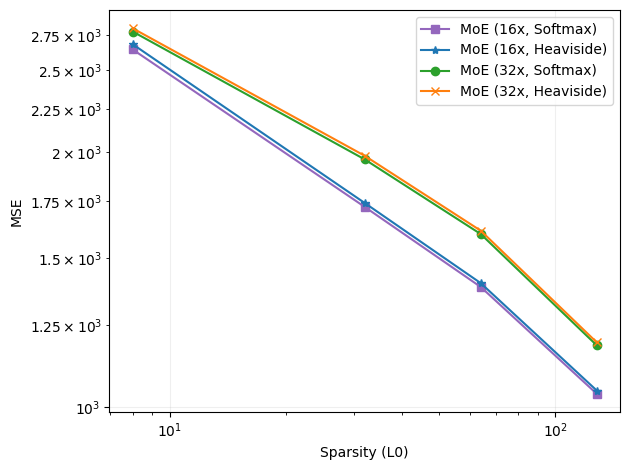

In [77]:
plt.plot(df16s['l0'], df16s['mse_loss'], label='MoE (16x, Softmax)', marker='s', color='#9467bd')
plt.plot(df16h['l0'], df16h['mse_loss'], label='MoE (16x, Heaviside)', marker='*', color='#1f77b4')
plt.plot(df32s['l0'], df32s['mse_loss'], label='MoE (32x, Softmax)', marker='o', color='#2ca02c')
plt.plot(df32h['l0'], df32h['mse_loss'], label='MoE (32x, Heaviside)', marker='x', color='#ff7f0e')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("experts_l0_mse.png")
plt.show()

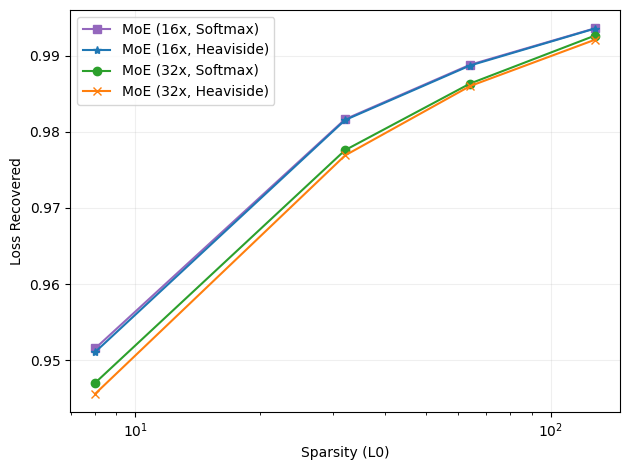

In [79]:
plt.plot(df16s['l0'], df16s['frac_recovered'], label='MoE (16x, Softmax)', marker='s', color='#9467bd')
plt.plot(df16h['l0'], df16h['frac_recovered'], label='MoE (16x, Heaviside)', marker='*', color='#1f77b4')
plt.plot(df32s['l0'], df32s['frac_recovered'], label='MoE (32x, Softmax)', marker='o', color='#2ca02c')
plt.plot(df32h['l0'], df32h['frac_recovered'], label='MoE (32x, Heaviside)', marker='x', color='#ff7f0e')


plt.xscale('log')
#plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Loss Recovered")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("experts_l0_lossrec.png")
plt.show()

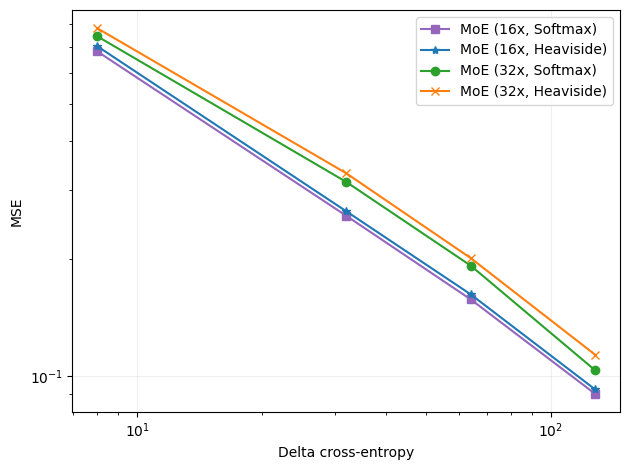

In [80]:
plt.plot(df16s['l0'], df16s['delta_ce'], label='MoE (16x, Softmax)', marker='s', color='#9467bd')
plt.plot(df16h['l0'], df16h['delta_ce'], label='MoE (16x, Heaviside)', marker='*', color='#1f77b4')
plt.plot(df32s['l0'], df32s['delta_ce'], label='MoE (32x, Softmax)', marker='o', color='#2ca02c')
plt.plot(df32h['l0'], df32h['delta_ce'], label='MoE (32x, Heaviside)', marker='x', color='#ff7f0e')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("Delta cross-entropy")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("experts_l0_deltace.png")
plt.show()